In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
anode_2 = pd.read_csv("anode_OCP_2.csv", header=None)
anode_3 = pd.read_csv("anode_OCP_3.csv", header=None)
cathode_2 = pd.read_csv("cathode_OCP_2.csv", header=None)
cathode_3 = pd.read_csv("cathode_OCP_3.csv", header=None)

In [2]:
ch_anode_2 = anode_2[:(anode_2[0].idxmax()+1)]
dch_anode_2 = anode_2[anode_2[0].idxmax():]
ch_anode_3 = anode_3[:(anode_3[0].idxmax()+1)]
dch_anode_3 = anode_3[anode_3[0].idxmax():]

ch_cathode_2 = cathode_2[:(cathode_2[0].idxmax()+1)]
dch_cathode_2 = cathode_2[cathode_2[0].idxmax():]
ch_cathode_3 = cathode_3[:(cathode_3[0].idxmax()+1)]
dch_cathode_3 = cathode_3[cathode_3[0].idxmax():]

In [3]:
f_ch_anode_2=interpolate.interp1d(ch_anode_2[0], ch_anode_2[1], fill_value ="extrapolate")
f_dch_anode_2=interpolate.interp1d(dch_anode_2[0], dch_anode_2[1], fill_value ="extrapolate")
f_ch_anode_3=interpolate.interp1d(ch_anode_3[0], ch_anode_3[1], fill_value ="extrapolate")
f_dch_anode_3=interpolate.interp1d(dch_anode_3[0], dch_anode_3[1], fill_value ="extrapolate")

f_ch_cathode_2=interpolate.interp1d(ch_cathode_2[0], ch_cathode_2[1], fill_value ="extrapolate")
f_dch_cathode_2=interpolate.interp1d(dch_cathode_2[0], dch_cathode_2[1], fill_value ="extrapolate")
f_ch_cathode_3=interpolate.interp1d(ch_cathode_3[0], ch_cathode_3[1], fill_value ="extrapolate")
f_dch_cathode_3=interpolate.interp1d(dch_cathode_3[0], dch_cathode_3[1], fill_value ="extrapolate")

In [45]:
x_anode = np.linspace(min(min(anode_2[0]), min(anode_3[0])), max(max(anode_2[0]), max(anode_3[0])), num = 10000)
x_cathode = np.linspace(min(min(cathode_2[0]), min(cathode_3[0])), max(max(cathode_2[0]), max(cathode_3[0])), num = 10000)

In [46]:
def anode_fit(p):
    return (sum((f_ch_anode_3(x_anode) - f_ch_anode_2(x_anode - p))**2) + sum((f_dch_anode_3(x_anode) - f_dch_anode_2(x_anode - p))**2))/len(x_anode)
    

In [47]:
def cathode_fit(p):
    return (sum((f_ch_cathode_3(x_cathode) - f_ch_cathode_2(x_cathode - p))**2) + sum((f_dch_cathode_3(x_cathode) - f_dch_cathode_2(x_cathode - p))**2))/len(x_cathode)
    

In [59]:
from scipy import optimize
anode_optm = optimize.least_squares(anode_fit, 0, method='trf', ftol=1e-12, verbose=2)
cathode_optm = optimize.least_squares(cathode_fit, 0, method='trf', ftol=1e-12, verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7357e-05                                    1.59e-03    
       1              2         6.6717e-06      2.07e-05       3.44e-02       2.23e-04    
       2              3         1.1765e-06      5.50e-06       5.99e-02       1.84e-05    
       3              5         1.0541e-06      1.22e-07       3.19e-02       8.28e-06    
       4              6         1.0143e-06      3.98e-08       7.98e-03       2.22e-06    
       5              8         1.0113e-06      3.08e-09       1.99e-03       9.10e-07    
       6              9         1.0108e-06      4.55e-10       1.99e-03       4.37e-07    
       7             11         1.0107e-06      1.36e-10       4.98e-04       9.42e-08    
       8             13         1.0107e-06      9.57e-12       1.25e-04       2.60e-08    
       9             16         1.0107e-06      2.85e-13       1.56e-05       1.04e-08    

In [60]:
anode_optm

 active_mask: array([0.])
        cost: 1.0106502358076996e-06
         fun: array([0.00142172])
        grad: array([-4.92418599e-09])
         jac: array([[-3.46353045e-06]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 17
        njev: 11
  optimality: 4.924185993241766e-09
      status: 1
     success: True
           x: array([-0.11490293])

In [61]:
cathode_optm

 active_mask: array([0.])
        cost: 1.564225484050972e-05
         fun: array([0.00559326])
        grad: array([1.71836022e-09])
         jac: array([[3.07220034e-07]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 16
        njev: 11
  optimality: 1.7183602177713552e-09
      status: 1
     success: True
           x: array([0.08192437])

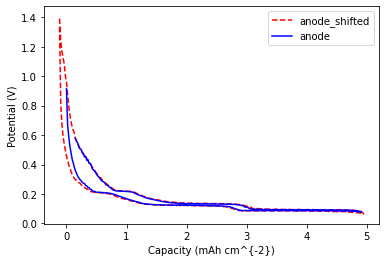

In [62]:
fig, ax = plt.subplots()
ax.plot((anode_2[0]+anode_optm.x), anode_2[1], 'r--', label='anode_shifted')
ax.plot(anode_3[0], anode_3[1], 'b', label='anode')
ax.legend()
plt.xlabel('Capacity (mAh cm^{-2})')
plt.ylabel('Potential (V)')
plt.show()

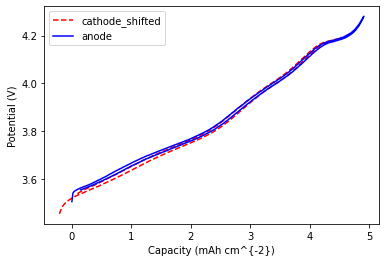

In [63]:
fig, ax = plt.subplots()
ax.plot((cathode_2[0]+cathode_optm.x), cathode_2[1], 'r--', label='cathode_shifted')
ax.plot(cathode_3[0], cathode_3[1], 'b', label='anode')
ax.legend()
plt.xlabel('Capacity (mAh cm^{-2})')
plt.ylabel('Potential (V)')
plt.show()

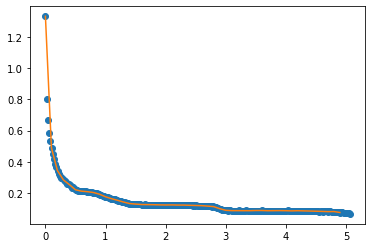

In [12]:
xnew = np.arange(0, 5, 0.1)
ynew = f_ch_anode_2(xnew)   # use interpolation function returned by `interp1d`
plt.plot(ch_anode_2[0], ch_anode_2[1], 'o', xnew, ynew, '-')
plt.show()

In [43]:
cathode_2[0]+cathode_optm.x

0      0.066019
1      0.084918
2      0.103818
3      0.122718
4      0.141618
         ...   
493   -0.164615
494   -0.183503
495   -0.202392
496   -0.221281
497   -0.237624
Name: 0, Length: 498, dtype: float64

In [44]:
cathode_2[0]

0      0.012171
1      0.031070
2      0.049970
3      0.068870
4      0.087770
         ...   
493   -0.218463
494   -0.237351
495   -0.256240
496   -0.275129
497   -0.291472
Name: 0, Length: 498, dtype: float64